# DTSC5502 Midterm

As a data scientist at a top secret lab, you've been asked to clean and explore a dataset containing variables you've never seen before and have no knowledge of as the variables have been anonymized. Write a brief overview of how you plan to approach this project.

Enter your student id, in the next cell, when asked and then run the cell. Do not edit the cell and be careful about running the cell as it will rewrite your dataset.

## MidTerm Activity

 by Jahnavi Chintakindi

### Overview
I would be generating the datsset by creating it and understanding the shape and description. Firstly, will be performing the data preperation techniques such as finding the constants, quasi constants, duplicates, dropping these found columns and rows. Next, will find the outliers and missing data using null function, replacing it with mean, median or mode values. then move on to Exploratory data where will be dealing with multicolinearity and in the end will have the analyzed results of the variables and features that show the Linear regression, OLS model with the top most columns having the lowest p values and weights of each showing the scatter plots of three features with the lowest p-values and confidence intervals.

### Generate Seed and Data

In [ ]:
# create seed, run this cell as is, only edit your stud_id
import pandas as pd
import numpy as np
import pandas as pd
import string
import random
import re
from sklearn.datasets import make_regression


def make_null(r, w):
    rtn = random.choices([np.nan, r], weights=[w, 100-w])
    return re.sub(r"[\[\]]",'', str(rtn))


# provide your student id as stud_id, replace 123456789 (automatice 0 if not replaced with your student id)
stud_id = 11711379
my_seed = random.seed(stud_id)

# Do not edit this cell beyond this line
variables = [''.join(random.choices(string.ascii_lowercase, k=3)) for _ in range(20)]
print(variables)

X, y = make_regression(n_samples=100, n_features=10, n_informative=6)
random.shuffle(variables)
cols = variables[:10]
df = pd.DataFrame(data=X, columns=cols)
df[cols[0]] = round(df[cols[0]], 4)
df[variables[10]] = 0.03
df[variables[11]] = 0.07
df[variables[12]] = df[variables[0]]
df[variables[13]] = df[cols[1]]
df[variables[10]] = df[variables[10]].apply(make_null, args=(2,))
df[variables[13]] = df[variables[13]].apply(make_null, args=(5,))
df[variables[14]] = random.sample(range(100, 1000), k=100)
df[variables[15]] = random.sample(range(1000, 10000), k=100)

df[variables[7]] = df[variables[7]].apply(lambda r: abs(r) if (r < -0.02) else r)
df[variables[8]] = df[variables[8]].apply(lambda r: abs(r)*-1 if (r > 0.01) else r)
df[variables[9]] = df[variables[9]].apply(lambda r: abs(r) if (r < -0.01) else r)
df[variables[7]] = df[variables[7]].apply(make_null, args=(7,))
df[variables[8]] = df[variables[8]].apply(make_null, args=(8,))
df[variables[9]] = df[variables[9]].apply(make_null, args=(9,))

df = df[np.random.default_rng(seed=my_seed).permutation(df.columns.values)]

cats = [random.choice(['x', 'o']) for i in range(100)]
df['survival'] = cats
cats = [random.choice(['yes', 'no']) for i in range(100)]
df['treatment'] = cats
cats = [random.choice(['level 1', 'level 2', 'level 3']) for i in range(100)]
df['level'] = cats
cats = [random.choice(['stage 5', 'stage 4', 'stage 3', 'stage 2', 'stage 1']) for i in range(100)]
df['stage'] = cats

df['target'] = y

dupes = df.loc[0:5]
df = pd.concat([df, dupes], axis=0)
df = df.sample(frac=1).reset_index(drop=True)

#df.to_csv('midterm.csv', index=False) # comment this out after successful run so that you don't overwrite your data

['azd', 'oip', 'pnk', 'xtp', 'icw', 'bcd', 'mqw', 'mej', 'rhu', 'djr', 'jme', 'igb', 'pix', 'mbh', 'uxu', 'zqa', 'qpn', 'wru', 'gck', 'afk']


### Data Prep

In [ ]:
# create dataframe from midterm.csv and print shape, info(), and head()
Vardf =  pd.read_csv("midterm.csv")
print("shape of the data frame is: ", Vardf.shape)
print("Info of the Dataframe is: ",Vardf.info())
Vardf.head()

shape of the data frame is:  (106, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pnk        106 non-null    float64
 1   igb        106 non-null    float64
 2   bcd        106 non-null    int64  
 3   wru        103 non-null    float64
 4   afk        106 non-null    float64
 5   xtp        96 non-null     float64
 6   icw        91 non-null     float64
 7   mej        106 non-null    float64
 8   uxu        106 non-null    float64
 9   oip        104 non-null    float64
 10  mbh        98 non-null     float64
 11  djr        106 non-null    float64
 12  gck        106 non-null    float64
 13  pix        106 non-null    float64
 14  jme        106 non-null    int64  
 15  qpn        106 non-null    float64
 16  survival   106 non-null    object 
 17  treatment  106 non-null    object 
 18  level      106 non-null    object 
 19  stage      

,pnk,igb,bcd,wru,afk,xtp,icw,mej,uxu,oip,...,djr,gck,pix,jme,qpn,survival,treatment,level,stage,target
0,-1.568492,-0.236731,611,0.503955,-1.3194,0.255647,-0.662737,0.07,0.480025,0.03,...,1.480645,-1.3194,0.018164,3426,-1.057960,x,yes,level 2,stage 3,103.239720
1,-1.452650,1.219359,182,0.806196,0.5534,0.056918,-0.367491,0.07,-0.092503,0.03,...,0.228740,0.5534,0.265263,5968,-0.606283,o,yes,level 2,stage 3,123.560604
2,-0.296567,2.062819,663,2.590852,-0.0864,0.066420,NaN,0.07,-0.049046,0.03,...,1.266301,-0.0864,-0.072434,5565,-0.517231,x,no,level 1,stage 3,297.976212
3,0.115569,-1.197595,569,0.186284,0.9988,1.242492,-0.090711,0.07,1.410539,0.03,...,-0.942500,0.9988,0.224105,8882,-0.772877,o,no,level 3,stage 1,-134.577232
4,-0.924547,3.255705,351,0.480679,-0.6016,0.566518,-0.533793,0.07,-1.485138,0.03,...,1.155390,-0.6016,-1.641908,5343,0.443249,x,yes,level 3,stage 2,195.510063


In [ ]:
Vardf.isna().sum()

pnk           0
igb           0
bcd           0
wru           3
afk           0
xtp          10
icw          15
mej           0
uxu           0
oip           2
mbh           8
djr           0
gck           0
pix           0
jme           0
qpn           0
survival      0
treatment     0
level         0
stage         0
target        0
dtype: int64

In [ ]:
# identify constants
constants = [ x for x in df.columns if len(df[x].fillna(0).unique()) == 1 ]

constants

['mej']

In [ ]:
# drop constants
Vardf.drop(constants, axis=1, inplace=True)
Vardf.shape

(106, 20)

In [ ]:
df['oip']

0      0.03
1      0.03
2      0.03
3      0.03
4      0.03
       ... 
101    0.03
102    0.03
103    0.03
104    0.03
105    0.03
Name: oip, Length: 106, dtype: object

In [ ]:
# identify quasi constant values (sometimes these may be boolean features)
quasi_constants = []
for val in df.columns.sort_values():
    if (len(df[val].unique()) < 3):
        val_counts = df[val].value_counts(normalize=True)
        print(val_counts)
        if list(val_counts)[0] > 0.98:
            quasi_constants.append(val)

print('quasi_constants: ', quasi_constants)

0.07    1.0
Name: mej, dtype: float64
0.03    0.981132
nan     0.018868
Name: oip, dtype: float64
x    0.537736
o    0.462264
Name: survival, dtype: float64
no     0.518868
yes    0.481132
Name: treatment, dtype: float64
quasi_constants:  ['mej', 'oip']


In [ ]:
# drop the variables with low cardinality (quasi constants with unbalanced labels)
print("shape of the df before the dropping Quasi Constant columns:", Vardf.shape)
df.drop(quasi_constants,axis = 1,inplace =True)
print("shape of the df after the dropping Quasi Constant columns:", Vardf.shape)
df.info()

shape of the df before the dropping Quasi Constant columns: (106, 20)
shape of the df after the dropping Quasi Constant columns: (106, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pnk        106 non-null    float64
 1   igb        106 non-null    float64
 2   bcd        106 non-null    int64  
 3   wru        106 non-null    object 
 4   afk        106 non-null    float64
 5   xtp        106 non-null    object 
 6   icw        106 non-null    object 
 7   uxu        106 non-null    float64
 8   mbh        106 non-null    object 
 9   djr        106 non-null    float64
 10  gck        106 non-null    float64
 11  pix        106 non-null    float64
 12  jme        106 non-null    int64  
 13  qpn        106 non-null    float64
 14  survival   106 non-null    object 
 15  treatment  106 non-null    object 
 16  level      106 non-null    obje

In [ ]:
# identify duplicate rows
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
101    False
102    False
103    False
104    False
105    False
Length: 106, dtype: bool

In [ ]:
# drop duplicate rows and print shape
print("shape before: ",Vardf.shape)
df.drop_duplicates(inplace = True)
print("shape after: ",Vardf.shape)

shape before:  (106, 20)
shape after:  (106, 20)


In [ ]:
# check of duplicate columns
duplicate_columns = []
for i in range(0, len(Vardf.columns)):
    original = Vardf.columns[i]

    for duplicate in Vardf.columns[i + 1:]:
        if Vardf[original].equals(Vardf[duplicate]):
            duplicate_columns.append(duplicate)
            print(f'{original} looks the same as {duplicate}')

duplicate_columns

afk looks the same as gck


['gck']

In [ ]:
# drop duplicate features
print("shape before: ",Vardf.shape)
Vardf.drop(duplicate_columns, axis=1, inplace = True)
print("shape after: ",Vardf.shape)
Vardf.info()

shape before:  (106, 20)
shape after:  (106, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pnk        106 non-null    float64
 1   igb        106 non-null    float64
 2   bcd        106 non-null    int64  
 3   wru        103 non-null    float64
 4   afk        106 non-null    float64
 5   xtp        96 non-null     float64
 6   icw        91 non-null     float64
 7   uxu        106 non-null    float64
 8   oip        104 non-null    float64
 9   mbh        98 non-null     float64
 10  djr        106 non-null    float64
 11  pix        106 non-null    float64
 12  jme        106 non-null    int64  
 13  qpn        106 non-null    float64
 14  survival   106 non-null    object 
 15  treatment  106 non-null    object 
 16  level      106 non-null    object 
 17  stage      106 non-null    object 
 18  target     106 non-null    float64
dtypes

#### Summary of Data Prep

the dataset consits of random columns with random values, so I proceeded with finding the dataframe shape, info and head values. It shows few constants, nunn values, and quasi constants. My approach is to eliminate these values to have a valid data to proceed further. I could see 1 constant value and 1 quasi_constant value quasi_constants:  ['mej', 'oip']. Then found out duplicate rows and columns and eliminated them which is the column afk looks the same as gck. Now the shape of the data set is (106,20).  

### Imputation

Use histograms to view the shape of your numerical features.
* Use median to replace missing data for skewed features
* Use interpolation to replace missing data for features that look normal

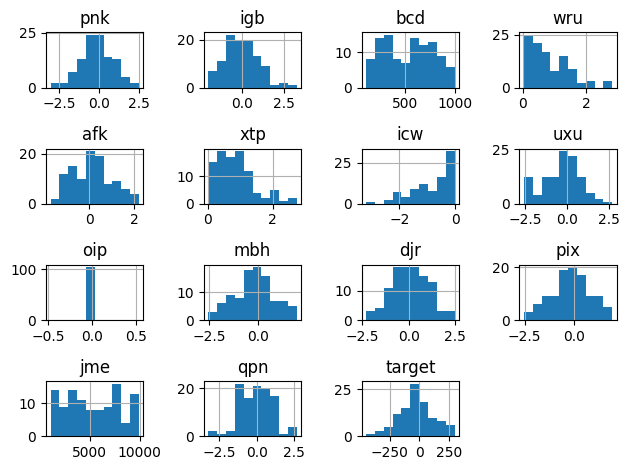

In [ ]:
# plot histograms
import matplotlib.pyplot as plt

Vardf.hist()
plt.tight_layout();

In [ ]:
# show null values for each variable
Vardf.isnull().sum()

pnk           0
igb           0
bcd           0
wru           3
afk           0
xtp          10
icw          15
uxu           0
oip           2
mbh           8
djr           0
gck           0
pix           0
jme           0
qpn           0
survival      0
treatment     0
level         0
stage         0
target        0
dtype: int64

In [ ]:
# print info to recall which variables are numeric vs categorical
Vardf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pnk        106 non-null    float64
 1   igb        106 non-null    float64
 2   bcd        106 non-null    int64  
 3   wru        103 non-null    float64
 4   afk        106 non-null    float64
 5   xtp        96 non-null     float64
 6   icw        91 non-null     float64
 7   uxu        106 non-null    float64
 8   oip        104 non-null    float64
 9   mbh        98 non-null     float64
 10  djr        106 non-null    float64
 11  gck        106 non-null    float64
 12  pix        106 non-null    float64
 13  jme        106 non-null    int64  
 14  qpn        106 non-null    float64
 15  survival   106 non-null    object 
 16  treatment  106 non-null    object 
 17  level      106 non-null    object 
 18  stage      106 non-null    object 
 19  target     106 non-null    float64
dtypes: float64

In [ ]:
# replace missing data with appropriate mean, median, or mode and confirm with isnull().sum()
numeric_columns = Vardf.select_dtypes(include=['number']).columns
categorical_columns = Vardf.select_dtypes(include=['object']).columns

for column in numeric_columns:
    if Vardf[column].skew() > 1.0:
        median = Vardf[column].median()
        Vardf[column].fillna(median, inplace=True)
    else:
        mean = Vardf[column].mean()
        Vardf[column].fillna(mean, inplace=True)

for column in categorical_columns:
    mode = Vardf[column].mode()[0]
    Vardf[column].fillna(mode, inplace=True)
null_counts = Vardf.isnull().sum()
print(null_counts)

pnk          0
igb          0
bcd          0
wru          0
afk          0
xtp          0
icw          0
uxu          0
oip          0
mbh          0
djr          0
pix          0
jme          0
qpn          0
survival     0
treatment    0
level        0
stage        0
target       0
dtype: int64


#### Summary of Missing Data
I used matplotlib.pyplot library to plot histograms for each columns to view the shape of your numerical features.
Then while finding the null values for each feature I could see the xtp, icw, oip, mbh as non null values. For skwewed features, we have to use the median to replace missing data, using the info function the categorical vs numerical values are shown.
Use interpolation, we have to replace the missing data with appropriate mean, median, or mode and confirm with isnull().sum() to replace missing data for features that look normal. At last, all the values look null and we are good to proceed further.

### Train Test Split

Whatever we do with X_train we have to do with X_test but with some considerations:

* if we scale a feature, we fit_transform (train) on X_train and then only transform on X_test
* For things like Variance Inflation Factor, we find the VIF scores for X_train only, but after we decide which features to drop we have to drop from both X_train and X_test

In [ ]:
# train test split (target is the dependent (y) variable), print the shapes for X_train and X_test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df.drop("target",axis=1),
                                                 df["target"],
                                                 test_size = 0.25,
                                                 random_state=42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(75, 17)
(25, 17)
(75,)
(25,)


**Important:** We will not be using df (the dataframe we created above) for the remaining code. Instead we will be using X_train for df and X_test when appropriate.

### Exploratory Data Analysis

In [ ]:
# describe X_train
x_train.describe()

,pnk,igb,bcd,afk,uxu,djr,pix,jme,qpn
count,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000
mean,-0.086391,-0.063138,552.053333,0.104231,-0.199324,0.014061,-0.199688,5070.520000,-0.122156
std,1.037000,0.974425,256.646560,0.902717,1.052528,1.002483,0.985242,2617.608272,1.007890
min,-3.046492,-1.954577,112.000000,-1.736400,-2.453808,-2.303387,-2.535860,1114.000000,-3.243124
25%,-0.704995,-0.682061,317.500000,-0.571000,-0.835356,-0.703935,-0.829318,3005.000000,-0.835943
50%,-0.083090,-0.182562,591.000000,0.133300,-0.134712,0.046802,-0.093562,5081.000000,-0.122801
75%,0.616444,0.471378,780.500000,0.599050,0.442925,0.696112,0.434427,7216.000000,0.539110
max,2.484812,2.682255,993.000000,2.215900,2.676179,2.457077,1.566521,9779.000000,2.448711


Using X_train.describe(), identify the two features with max values greater than 100. These features have scales that are quite different than the other features and must be scaled so that they share the same scale as the other features. Standardize one feature and Normalize the other feature.

In [ ]:
# standardize feature
Vardf['jme'] = (Vardf['jme'] - Vardf['jme'].mean()) / Vardf['jme'].std()
print("Max of jme after standardizing: ",Vardf['jme'].max())
Vardf['bcd'] = (Vardf['bcd'] - df['bcd'].mean()) / Vardf['bcd'].std()
print("Max of bcd after standardizing: ",Vardf['bcd'].max())

Max of jme after standardizing:  1.709888627942935
Max of bcd after standardizing:  4.0828285801272015


In [ ]:
# normalize feature
numeric_columns = x_train.select_dtypes(include=['number'])

x_train = (numeric_columns - numeric_columns.min()) / (numeric_columns.max() - numeric_columns.min())

x_train

,pnk,igb,bcd,afk,uxu,djr,pix,jme,qpn
15,0.505044,0.277198,0.259932,0.336159,0.676902,0.633013,0.283546,0.279631,0.456016
41,0.741166,0.275814,0.761635,0.234142,0.628924,0.413467,0.798488,0.971956,0.380002
102,0.845174,0.450791,0.820658,0.495813,0.555409,0.660208,0.446523,0.654241,0.689473
9,0.450168,0.488225,0.703746,1.000000,0.308679,0.732868,0.179418,0.282747,0.665962
74,0.553319,0.599943,0.443814,0.547377,0.488552,0.382730,0.285426,0.050202,0.541853
...,...,...,...,...,...,...,...,...,...
62,0.717151,0.475018,0.497162,0.439213,0.256274,0.572219,0.608735,0.000000,0.744612
73,0.569125,0.660514,0.575482,0.140551,0.425504,0.659381,0.331796,0.088748,0.354180
14,0.605431,0.361466,0.875142,0.370164,0.585370,0.460591,0.590603,0.457819,0.381531
97,0.587943,0.246853,0.641317,0.834754,0.337726,0.734253,0.753860,0.306405,0.522331


In [ ]:
# describe X_train again to verify transformations
x_train.describe()

,pnk,igb,bcd,afk,uxu,djr,pix,jme,qpn
count,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000
mean,0.535154,0.407916,0.499493,0.465711,0.439472,0.486811,0.569467,0.456609,0.548324
std,0.187478,0.210149,0.291313,0.228403,0.205172,0.210585,0.240164,0.302090,0.177076
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.423317,0.274437,0.233258,0.294866,0.315489,0.335987,0.415988,0.218234,0.422918
50%,0.535751,0.382161,0.543700,0.473066,0.452067,0.493689,0.595337,0.457819,0.548210
75%,0.662219,0.523192,0.758797,0.590909,0.564667,0.630085,0.724040,0.704212,0.664502
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# X_train.info()
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75 entries, 15 to 52
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pnk     75 non-null     float64
 1   igb     75 non-null     float64
 2   bcd     75 non-null     float64
 3   afk     75 non-null     float64
 4   uxu     75 non-null     float64
 5   djr     75 non-null     float64
 6   pix     75 non-null     float64
 7   jme     75 non-null     float64
 8   qpn     75 non-null     float64
dtypes: float64(9)
memory usage: 5.9 KB


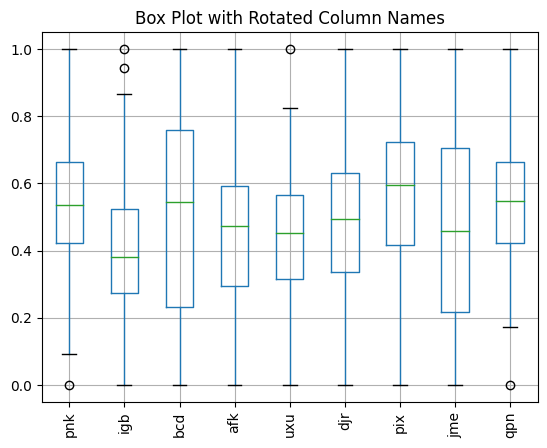

In [ ]:
# check for outliers
x_train.boxplot()
plt.xticks(rotation=90)  # Rotate the column names by 90 degrees
plt.title('Box Plot with Rotated Column Names')
plt.show()

In [ ]:
# vif test
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = x_train._get_numeric_data().copy()
# add constant
X.insert(0, 'const', 1)

# create dataframe to store vif information
vif = pd.DataFrame()
vif['Variable'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# remove constant (first row) and show vif dataframe
X.drop('const', axis=1, inplace=True)
vif = vif.iloc[1: , :]
vif

,Variable,VIF
1,pnk,1.085996
2,igb,1.040777
3,bcd,1.084900
4,afk,1.190114
5,uxu,1.079385
6,djr,1.182821
7,pix,1.174022
8,jme,1.077027
9,qpn,1.065516


In [ ]:
vif['VIF']

1    1.085996
2    1.040777
3    1.084900
4    1.190114
5    1.079385
6    1.182821
7    1.174022
8    1.077027
9    1.065516
Name: VIF, dtype: float64

In [ ]:
# delete one of the features out of the pair(s) that show multicollinearity
cols = ['afk','djr']
x_train.drop(cols,axis = 1,inplace = True)

In [ ]:
# verify you no longer have multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = x_train._get_numeric_data().copy()
# add constant
X.insert(0, 'const', 1)

# create dataframe to store vif information
vif = pd.DataFrame()
vif['Variable'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# remove constant (first row) and show vif dataframe
X.drop('const', axis=1, inplace=True)
vif = vif.iloc[1: , :]
vif

,Variable,VIF
1,pnk,1.075469
2,igb,1.033496
3,bcd,1.048132
4,uxu,1.033173
5,pix,1.109127
6,jme,1.050156
7,qpn,1.051828


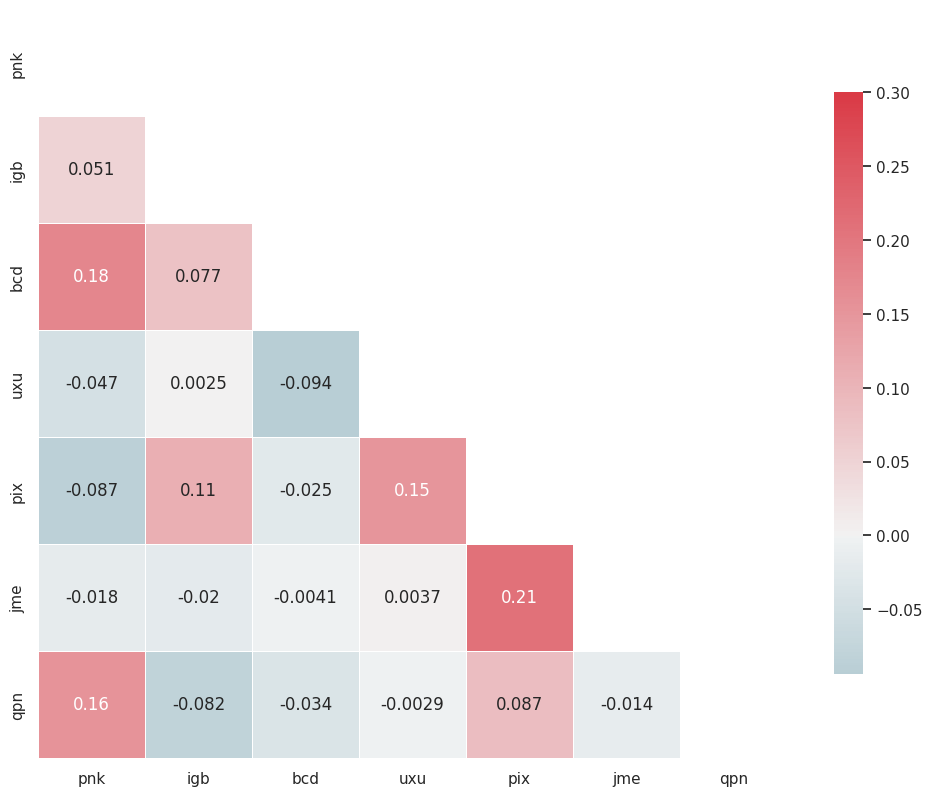

In [ ]:
# show correlation heat map for features, check for multicollinearity
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# correlation matrix
sns.set(style="white")

# compute the correlation matrix
corr  = x_train.corr()
# generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# set up the matplotlib figure
# f, ax = plt.subplots()
f = plt.figure(figsize=(10, 12))

# generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True);

plt.tight_layout()

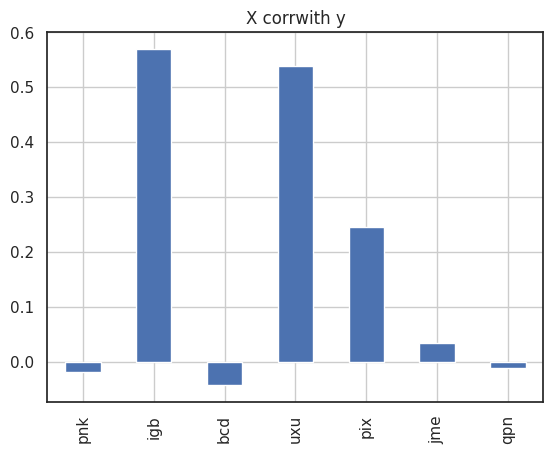

In [ ]:
# correlation with target
x_train.corrwith(y_train).plot.bar(title='X corrwith y', rot=90,grid=True);

#### Summary of EDA
 Using X_train.describe(), 'jme' and 'bcd' are the identifed two features with max values greater than 100, rest all the values are unit digit. As these features have scales that are quite different than the other features and must be scaled so that they share the same scale as the other features. Moving on to Standardizing one feature and Normalizing the other feature, Further on, using described the X_train function to verify transformations and x_train.info(). Now, we have to find the outliers in the dataset which helps in identifying the extreme values.
 Next, based on the VIF results we have to delete one of the features out of the pair(s) that show multicollinearity so have deleted the column names['afk','djr']. Also, verified that there is no longer have multicollinearity then used the correlation heat map for features to check for multicollinearity present in the dataframe and used the bar plot to correlation with target.

In [ ]:
cols = ['afk','djr']
x_test.drop(cols,axis = 1,inplace = True)

In [ ]:
x_test.shape

(25, 15)

In [ ]:
# create and train a Linear Regression model from the sklearn.linear_model library (be sure to only use numeric data - _get_numeric_data() for X_train and X_test)
# make predictions and provide MSE and RSquared scores
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
x = x_train._get_numeric_data()
y = y_train._get_numeric_data()
x_tes = x_test._get_numeric_data()
model = LinearRegression()
model.fit(x,y)

yhat = model.predict(x_tes)
print("MSE:",mean_squared_error(y_test,yhat))
print("RSQUARE:",r2_score(y_test,yhat))

MSE: 4365396176.376191
RSQUARE: -219148.30109505504


In [ ]:
# create an OLS model from statsmodels and print the summary
import statsmodels.api as sm
# x_train.insert(0, 'const',1)
model = sm.OLS(y ,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 target   R-squared (uncentered):                   0.430
Model:                            OLS   Adj. R-squared (uncentered):              0.372
Method:                 Least Squares   F-statistic:                              7.339
Date:                Fri, 06 Oct 2023   Prob (F-statistic):                    1.50e-06
Time:                        20:39:52   Log-Likelihood:                         -461.20
No. Observations:                  75   AIC:                                      936.4
Df Residuals:                      68   BIC:                                      952.6
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
pnk         -158.7427     70.444     -2.253      0.027    -299.312     -18.173
igb          300.2140     63.709      4.712      0.000     173.085     427.343
bcd          -77.9805     46.975     -1.660      0.102    -171.717      15.756
uxu          253.9191     63.669      3.988      0.000     126.869     380.969
pix          -18.0901     58.567     -0.309      0.758    -134.960      98.779
jme          -39.6745     45.776     -0.867      0.389    -131.020      51.671
qpn         -165.7014     70.267     -2.358      0.021    -305.918     -25.485
==============================================================================
Omnibus:                        0.459   Durbin-Watson:                   1.830
Prob(Omnibus):                  0.795   Jarque-Bera (JB):                0.444
Skew:                          -0.176   Prob(JB):                        0.801
Kurtosis:                       2.868   Cond. No.                         8.47
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

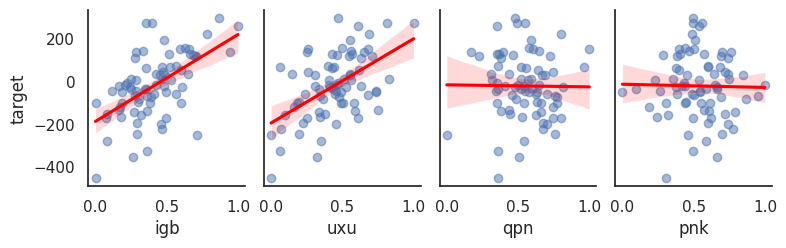

In [ ]:
# create a seaborn pairplot showing the scatter plots of three features with the lowest p-values from the summary above
# include line of best fit and the translucent confidence intervals
import pandas as pd
import seaborn as sns
sns.pairplot(data=pd.concat([x_train, y_train],axis=1),
                               x_vars=['igb','uxu','qpn','pnk'],y_vars = 'target',
                               kind = 'reg',
                               aspect=0.8,
                               plot_kws ={'line_kws':{'color':'red'},
                                          'scatter_kws':{'alpha':0.5}}
                            );

### Using Linear Algebra to get Weights

Take these three features and get the weights of these features by using np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)) as found in the The DataFrame as a Matrix section of the Module 6 Activity notebook. Then using an f string extract the weights from these variables and print a line equation that resembles the example found in the Linear Algebra section of the Module 6 Activity notebook that reads $h_\theta(x) = \theta_0 + \theta_1x_1 ... \theta_nx_n$

In [ ]:
# code here
weights = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
print(f"h_theta(x) = {weights[0]:.2f} + {weights[1]:.2f}x1 + {weights[2]:.2f}x2 ")

h_theta(x) = -158.74 + 300.21x1 + -77.98x2 


### Summary

Share some thoughts on what you have discovered during this analysis

 On an overall, have analyzed the dataset, cleaned and explored this dataset containing variables which are unknown to knowledge of as the variables have been anonymized. while cleaning the dataset there were few more null values, reviewed the dataset manually and then moved on to find the collinearity and multicollinearity, where specific characteristics exhibited robust correlations.
 To tackle this issue, we eliminated two sets of highly correlated features, which enabled us to conduct our analysis successfully by using the meansquare equation and r square equation. Finally, we identified the four features with the most statistically significant p-values in the results obtained from the Ordinary Least Squares (OLS) regression.